# Final project

The goal of this assignment is to solve a time dependent PDE in two dimensions, using a *p*-version of the Finite Element Method, i.e., we maintain a single (square) cell to approximate a square domain, and we construct a polynomial basis with increasing order, to study the convergence properties of the Finite Element Method when the order of the polynomials increases. 

## Continuous problem
The problem we want to solve is the following: given a sufficiently regular $f(x,t)$ and $u_0(x)$, for any $t \in [0,T]$, find $u(x,t)$ such that

$$
\begin{aligned}
& \frac{\partial u(x,t)}{\partial t} - \Delta u(x,t) && = f(x,t) \qquad &\text{ in } \Omega \times [0,T] = [0,1]\times[0,1] \times [0,T] \\
& n(x)\cdot\nabla u(x,t) && = 0 &\text{ on } \partial \Omega \times [0,T] \\
& u(x,0) &&= u_0(x) &\text{ in } \Omega,
\end{aligned}
$$
where $\Delta$ and $\nabla$ are the Laplacian and gradient in space, and $n(x)$ is the outer normal to the domain $\Omega$ at the point $x = (x_0, x_1)$. In what follows we will use $u_t$ to indicate the partial derivative with respect to time of the variable $u$.

Such problem can be written in weak form by multiplying with a test function $v \in V = H^1(\Omega)$, integrating by parts the term with the Laplacian, and taking into account the boundary conditions:

$$
\begin{aligned}
& (u_t,v) + (\nabla u, \nabla v) && = (f,v) \qquad &\forall v \in V, \forall t \in [0,T]\\
& u(x,0) &&= u_0(x) &\text{ in } \Omega,
\end{aligned}
$$

where we used the notation $(a,b) := \int_\Omega a \,b \,\text{d} \Omega$ for the inner product in $L^2(\Omega)$.

## Semi-discretization

Existence, uniqueness and regularity of such problem will not be our concern here. Our goal is to construct a Galerkin approximation in space (a semi-discretization), to reduce the problem to a system of Ordinary Differential Equations of the following form:

$$
\begin{aligned}
&M u_t + A u && = F \qquad & \text{ in } R^n \times [0,T]\\
&u(0) && = U_0& \text{ in } R^n,
\end{aligned}
$$

and then solve the resulting system using a standard ODE algorithm, among those we have seen in class. The matrices $M$ and $A$, and the vectors $F$ and $U_0$ are obtained by imposing the weak form of the problem in a finite dimensional subspace $V_h$, i.e., 

$$
V_h := \text{span} \{ v_i \}_{i=0}^n
$$

and looking for a time dependent discrete function $u_h(x,t)$ such that

$$
u_h(x,t) := u^j(t) v_j(x) \qquad j=0,\ldots, n-1
$$

If we impose that the weak problem is satisfied on $u_h$ for each basis function $v_i$, we obtain

$$
\begin{aligned}
& (u^j_t v_j,v_i) + (u^j\nabla v_j, \nabla v_i) && = (f,v_i) & i=0,\ldots, n-1, \quad \forall t \in [0,T]\\
& u^j(0) && = u^j_0,
\end{aligned}
$$

and we recognize the matrix form above with 

$$
\begin{aligned}
M_{ij} &:= (v_j, v_i) \\
A_{ij} &:= (\nabla v_j, \nabla v_i) \\
F_{i} &:= ( f, \nabla v_i)
\end{aligned}
$$

## Finite difference approximation in time

If we look for a solution in time at fixed times $t^k = k \,dt$, and approximate the time derivative using backward euler approximation, i.e, 

$$
u_t(t^k) \sim \frac{u^k-u^{k-1}}{dt}
$$

then the above problem can be solved sequentially by setting $u^0 = u_0$, and solving for each $k$

$$
\begin{aligned}
&M u^k + dt\, A u^k && = dt \,F^k + M u^{k-1} \qquad & \text{ in } R^n , k>0
\end{aligned}
$$

until $k = T/dt$. 

## General ODE setting

The final problem is of the form

$$
u_t = g(t,u)
$$

where 

$$
g(t,u) := M^{-1}(F-A)u
$$

In this form, we could use the `scipy.integrate.odeint` package or the `scipy.integrate.ode` class to advance in time using `scipy` facilities instead of computing ourselves the finite difference approximation of $u_t$.  

## Assignment steps

- Construct the space $V_h$ of tensor product Lagrange polynomials of order $q$ in two dimensions, using $q+1$ Chebyshev support points in the interval [0,1] for each dimension. Such space is interpolatory at the Chebyshev points, its basis functions do not oscillate too much, and it is a good approximation space for Spectral Element Approximations in two dimensions;
- Construct a two-dimensional quadrature formula (a collection of $nq$ quadrature points and $nq$ quadrature weights), based on the tensor product between Gauss quadrature formulas in one dimension, which is exact for polynomials of order $2q$ (the resulting polynomials which appear when constructing the matrix $M$);
- Construct the matrices $Q$, $D0Q$ and $D1Q$ of dimension $nq\times n$, where $nq$ is the number of quadrature points of the formula above, and $n$ is the number of basis functions which generate $V_h$. These matrices are defined as:
$$
\begin{aligned}
Q_{qi} &:= v_i(x_q) \qquad i=0,\ldots, n-1, \qquad q = 0,\ldots,nq \\
D0Q_{qi} &:= \frac{\partial v_i}{\partial x_0}(x_q) \qquad i=0,\ldots, n-1, \qquad q = 0,\ldots,nq\\
D1Q_{qi} &:= \frac{\partial v_i}{\partial x_1}(x_q) \qquad i=0,\ldots, n-1, \qquad q = 0,\ldots,nq
\end{aligned}
$$
and corresponds to the interpolationa matrices of the values, x-derivatives and y-derivatives of the basis functions on the quadrature points;
- Using `einsum` applied to Q, D0Q, D1Q, and the quadrature weights, construct the matrices $A$ and $M$ and a function `assemble_rhs` which returns $F(t)$ given a forcing term $f(x,t)$;
- Test your implementation of the mass matrix $M$, and of the `assemble_rhs` function by computing the error of the $L^2$-projection of the function $w(x) = \sin(2 \pi x_0) \sin(2\pi x_1)$, i.e., solve the problem
$$
w_h = M^{-1} W
$$
where $W$ is computed using `assemble_rsh` with argument $w(x)$, and compute
$$
\| w_h - w \|_0 := \sqrt{\int_\Omega (w_h - w)^2 \text{d}\Omega}
$$
for increasing values of the polynomial order $q$. Plot the error as a function of the number of degrees of freedom (the dimension $n$ of the space $V_h$) in a log-log plot (remember to use the matrix Q to evaluate $w_h$ on the quadrature points);
- Construct a manufactured forcing term for the time dependent PDE, such that the exact solution to the problem above is a traveling `sin` or `cos` function, muliplied by a polynomial whose values and normal derivatives are zero on $\partial \Omega$ (to satisfy the boundary conditions);
- At fixed polinomial degree (=5), compute a solution of the time-dependent problem with this manufactured forcing term for different values of dt (1/2, 1/4, 1/8, 1/16, etc), up to t=1.0, and plot the error between the exact solution and the computed one, as a function of the time step dt (in log-log scale);
- At fixed time step (=1/64), compute a solution of the time-dependent problem with this manufactured forcing term for different values of the polynomial degree (3,4,5,6,7,8,9,10), up to t=1.0, and plot the error between the exact solution and the computed one, as a function of the number of degrees of freedom (in log-log scale);

## Optional steps
- Repeat last two steps by changing the boundary conditions of the problem to homogeneous Dirichelt boundary conditions, instead of homogeneous Neumann boundary conditions;
- Use `scipy.integrate.ode` to advance in time up to t=1.0, and find (roughly) the time step you should use in the code you wrote above to reach the same accuracy. Compare the computational cost in the two cases;
- Repeat the same process using `scipy.integrate.odeint` instead of `scipy.integrate.ode`;
- Change the code you wrote to use a second order method instead of the first order we implemented (choose the one you prefer among the secondo order methods you have seen in class), and create the same error-VS-timestep plot you did before at t=1.0.


In [1]:
%pylab inline
from numpy.polynomial.polynomial import Polynomial
from numpy.polynomial.legendre import *
from numpy.testing import *

Populating the interactive namespace from numpy and matplotlib


## Define Lagrange Basis on Chebyshev points


In [2]:
# Function that return q Chebyshev points
def chebyshev_points(q):
    Cheb = [cos( (2. * k - 1.) * pi / ( 2. * q) ) for k in arange(1, q + 1)]
    return array(Cheb)

In [3]:
def lagrange_basis(q):
    n = q.shape[0]
    L = [Polynomial.fromroots([xj for xj in q if xj != q[i]]) for i in range(n)]
    L = [L[i]/L[i](q[i]) for i in range(n)]
    return L

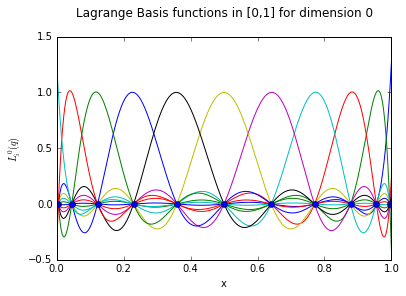

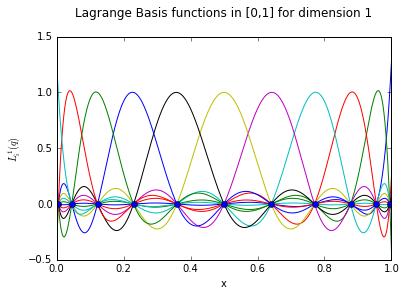

In [4]:
dim = 2 # dimension of the problem (in this case we are considering 2D problem)
q = 10 # number of basis functions for each dimension

N = [q, q] # order of Lagrange Basis along each dimension; need not necessarily be of the same size
Pts = [.5 * (chebyshev_points(n + 1) +1.) for n in N] # to have Lagrange Basis of dimension q we need q+1 points

LL = [lagrange_basis(q) for q in Pts]
LL_Prime = []
for d in range(dim):
    l = LL[d]
    LL_Prime += [[l[j].deriv() for j in range(len(l))]]

# plot of the functions (only for check):
x = linspace(0., 1., 1025)

#for i in range(len(N)):
#    for j in range(len(LL[i])):
#        plot(x, LL[i][j](x))
for i in range(dim):
    for f in LL[i]:
        plot(x, f(x))
    
    plot(Pts[i], Pts[i]*0., 'bo')
    xlabel('x')
    ylabel('$L_i^{%d}(q)$' % i)
    title('Lagrange Basis functions in [0,1] for dimension %d\n' % i)
    show()

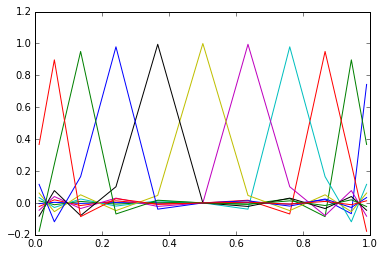

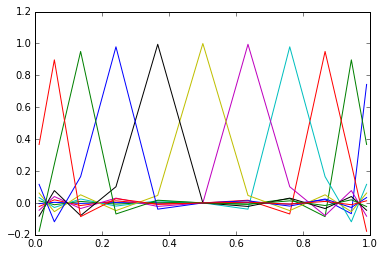

In [5]:
quadrature = []
weights = []
n_quad = N[0] + 1
Nq = [n_quad, n_quad]

assert_equal(len(Nq), len(N))

for np in Nq:
    p, w = leggauss(np)
    p = .5 * (p + 1.)
    w = .5 * w
    quadrature += [p]
    weights += [w]

Q  = []
DQ = []
for i in range(dim):
    n = N[i]
    nq = Nq[i]
    Q_part  = zeros((nq, n))
    DQ_part = zeros((nq, n))
    L  = LL[i]
    DL = LL_Prime[i]
    for j in range(n):
        Q_part[:, j]  = L[j](quadrature[i])
        DQ_part[:, j] = DL[j](quadrature[i])
    Q  += [Q_part]
    DQ += [DQ_part]
    
#plot of the matrix v_i(x_q)
for i in range(dim):
    plot(quadrature[i], Q[i])
    show()

In [6]:
Wx, Wy = meshgrid(weights[0],weights[1])
W = Wx*Wy
W = W.flatten()
W = diag(W)

In [7]:
B = einsum('ai, bj -> abij', Q[1], Q[0])
print(B.shape)
B = B.reshape((Nq[0]*Nq[1],N[0]*N[1]))
print(B.shape)
M = B.T.dot(W.dot(B))
print(M.shape)

Ax = einsum('ai, bj -> abij', Q[1], DQ[0])
Ax = Ax.reshape((Nq[0]*Nq[1],N[0]*N[1]))
Ay = einsum('ai, bj -> abij', Q[1], DQ[0])
Ay = Ay.reshape((Nq[0]*Nq[1],N[0]*N[1]))
# print(Ax.shape)
# print(Ay.shape)

Axx = Ax.T.dot(W.dot(Ax))
Ayy = Ay.T.dot(W.dot(Ay))
# print(Axx.shape)
# print(Ayy.shape)

(11, 11, 10, 10)
(121, 100)
(100, 100)


In [8]:
def assemble_rhs(f, quad, B, W):
    Qx, Qy = meshgrid(quad[0], quad[1])
    G = f(Qx, Qy).flatten()
    return B.T.dot(W.dot(G))

In [9]:
test = lambda x, y : sin(2*pi*x) * sin(2*pi*y)

rhs = assemble_rhs(test, quadrature, B, W)

print(rhs.shape)

(100,)


In [10]:
# test L^2 projection

wh_coeff = solve(M, rhs)

wh = B.dot(wh_coeff)

gx, gy = meshgrid(quadrature[0], quadrature[1])

to_sum = test(gx, gy).flatten()

integ = wh - to_sum

qd = integ*integ
# print(qd[5])
# print(integ)
# print(diag(integ))
done = W.dot(qd)

# print(done.shape)

# print(add.reduce(done))

final_res = (add.reduce(done))**.5
print(final_res)

0.00393248084435


In [11]:
results = ["0.0163788732417", "0.00393248084435", "1.35487714994e-09", "0.704422556687","0.052523216161"]
pol_order = ["6", "10", "20", "30", "40"]
print(results)

['0.0163788732417', '0.00393248084435', '1.35487714994e-09', '0.704422556687', '0.052523216161']
